# Assignment 10  - Tests of Association

## Instructions

1. Download `last_first_assignment10.ipynb` and fill in the code where indicated to complete the assignment. Feel free to add more cells than provided to try things out, and check what your variables look like, to see if you got the right results. Just make sure you have done what is asked for that question and that you don't delete any code we provide you with.

2. Rename this `last_first_assignment10.ipynb` file replacing `last` and `first` with your name. Make sure all the outputs are there (run each cell) and export the .py file.

3. Submit the .ipynb and .py file to Quercus.

## Questions and Support
1. Please ask class content questions on the class GitHub page: 
https://github.com/BME1478H/Winter2020class/ Expect a processing time of 1d for us to respond. As such, we cannot guarantee we can address your questions and work through all the troubleshooting in time if you ask them the night before or the day of the assignment deadline. Please plan accordingly.

Run the following cell to get started.

In [1]:
# load in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load in data
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

# subset 2014 for this assignment
world_data_2014 = world_data.loc[world_data['year'] == 2014]

**IMPORTANT NOTE: Use the `world_data_2014` subset for all the following questions** 

Do NOT use `world_data`, it is only used to read in our subset, doing otherwise will lead to the wrong results).

## Short Answer Questions (1 mark) 

Answer by editing the cell (this is a markup cell, you can write your answer in it by double clicking on it to open for editing).

a. What is multicolinearity in data? and why should we confirm that there is none amongst our independant variables when using linear regression? (0.3 marks)

- *Multicolinearity* refers to when two or more input variables are linearly dependent, i.e. one or more variables can be exactly predicted by the other variables. 
- Linear regression with colinear input variables creates a degenerate situation where some input variables contain the same information and the weight matrices are not invertible or numerically unstable.


b. Name one difference between using the `OLS()` function from  `statsmodels.api` versus the one from `statsmodels.formula.api`. (0.2 marks)

- With `statsmodels.formula.api.OLS()` the formula needs to be entered as a R-style `str`, whereas `statsmodels.api.OLS()` directly accepts data objects `y` as the response variable and `X` as the input variables without explictly requiring specifying the name of the variables.



## Task 1 (2 marks)

Is child mortality a predictor for a nation's life expectancy? 

a. Using `world_data_2014`, create a variable `x` that only has the values for the `child_mortality` column and a variable `y` that has the values for the `life_expectancy` column. (0.5 marks)

In [2]:
x = world_data_2014["child_mortality"]
y = world_data_2014["life_expectancy"]

# do not change the code below
print(x.head())
print(y.head())

214     76.1
433     14.4
652     25.6
871     91.2
1090     9.0
Name: child_mortality, dtype: float64
214     57.8
433     77.4
652     77.1
871     63.3
1090    77.1
Name: life_expectancy, dtype: float64


b. Use `sm.add_constant()` to add a column of 1.0's to `x` (store again in the same variable `x`). (0.5 marks)

In [3]:
x = sm.add_constant(x)

# do not change the code below
x.head()

,const,child_mortality
214,1.0,76.1
433,1.0,14.4
652,1.0,25.6
871,1.0,91.2
1090,1.0,9.0


c. Using the variables `x` and `y`, and the function `sm.OLS()`:
- define a variable `model` to create a simple OLS model.
- define a variable `results` where you fit the `model`. 

The first argument passed to the function is the dependant variable (i.e. `life_expectancy`) and the second argument is the independant variable (i.e. `child_mortality`). (0.5 marks)

In [4]:
model = sm.OLS(y, x)

results = model.fit()

# do not change the code below
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     577.6
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.27e-57
Time:                        20:11:04   Log-Likelihood:                -495.73
No. Observations:                 179   AIC:                             995.5
Df Residuals:                     177   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              78.6160      0.411    1

___
d. Use `sns.scatterplot()` to plot the `life_expectancy` against the `child_mortality` in the `world_data_2014` dataset. And in the same code cell, use `plt.plot()` to plot `results.fittedvalues` against the `child_mortality`. (0.5 marks)

Hint: make sure you pass the actual data/values to `plt.plot()`, i.e. `world_data_2014.child_mortality` not just the column name `"child_mortality"`

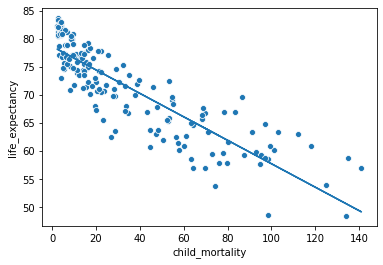

In [5]:
sns.scatterplot(x="child_mortality", y="life_expectancy", data=world_data_2014)
plt.plot(world_data_2014["child_mortality"], results.fittedvalues)
plt.show()

### Task 2  (3 marks)

In class, we learned about how to use the "formula" notation when we want to write out more complicated tests of interactions and associations in our data. 

For example, in our dataset, we tested whether `children_per_woman` was a predictor of `child_mortality` by writing a formula like so:


`child_mortality ~ children_per_woman`

To write out this formula, we put the dependant variable on the left and the independant variable on the right separated by `~`.


___

a. Write three formulas named `formula_1`, `formula_2`, and `formula_3` to test the following relationships in order:
1. formula_1: Does child_mortality predict a nation's life_expectancy?
2. formula_2: Does a nation's GDP (income) predict the co2_per_capita emissions?
3. formula_3: Does the years_in_school_women predict the number of children_per_woman born?

They need to be stored as strings. (1 mark)

In [6]:
formula_1 = "life_expectancy ~ child_mortality"
formula_2 = "co2_per_capita ~ income"
formula_3 = "children_per_woman ~ years_in_school_women"

Using formula_2 and formula_3 only:

b. Use `smf.ols()` to fit `world_data_2014` with the given formula. You can create and fit an OLS using `smf.ols` in one line by doing:

`smf.ols(formula=your_formula_variable, data=your_dataframe).fit()`

Store each result in res2, and res3, respectively (0.25 marks per formula, 0.5 total)

c. Use `sns.scatterplot()` to plot the dependant variable (y-axis) against the indepedant variable (x-axis) in the `world_data_2014` dataset. And in the same code cell, use `plt.plot()` to plot `res_number.fittedvalues` against the independant variable for the given formula. (0.25 marks per formula, 0.5 total)

In [7]:
# fit the regression for formula_2 here
res2 = smf.ols(formula=formula_2, data=world_data_2014).fit()


# do not change the code below
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:         co2_per_capita   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     341.1
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           3.84e-43
Time:                        20:11:04   Log-Likelihood:                -482.25
No. Observations:                 179   AIC:                             968.5
Df Residuals:                     177   BIC:                             974.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0372      0.365     -0.102      0.9

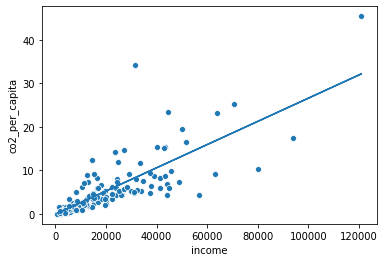

In [8]:
# create the plot for formula_2 here
sns.scatterplot(x="income", y="co2_per_capita", data=world_data_2014)
plt.plot(world_data_2014["income"], res2.fittedvalues)
plt.show()


In [9]:
# fit the regression for formula_3 here
res3 = smf.ols(formula=formula_3, data=world_data_2014).fit()


# do not change the code below
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:     children_per_woman   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     283.0
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.50e-38
Time:                        20:11:04   Log-Likelihood:                -229.24
No. Observations:                 179   AIC:                             462.5
Df Residuals:                     177   BIC:                             468.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.56

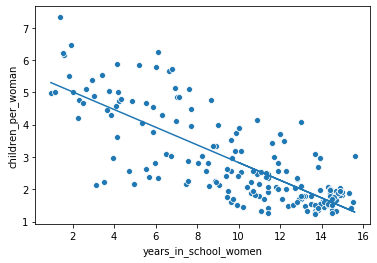

In [10]:
# create the plot for formula_3 here
sns.scatterplot(x="years_in_school_women", y="children_per_woman", data=world_data_2014)
plt.plot(world_data_2014["years_in_school_women"], res3.fittedvalues)
plt.show()


___
If we want to test for multivariate associations (y), we can modify our formulas to use the `+` symbol to indicate multiple independant variables on the right side of the `~` (e.g. x, m, b):

`y ~ x + m + b`
___

d. Let's take a look at multiple predictors for life_expectancy. Using `sns.lmplot`, plot the `life_expectancy` against the `child_mortality` where the hue is defined by the value in the `income_group` column. (0.5 marks)

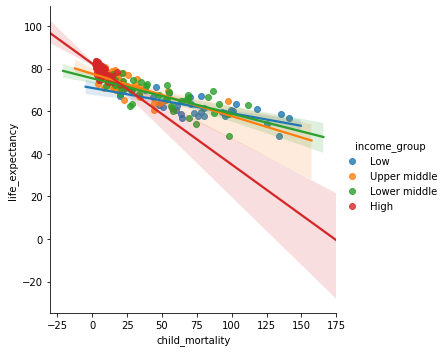

In [11]:
sns.lmplot(x="child_mortality", y="life_expectancy", hue="income_group", data=world_data_2014)


We see that there does seem to be a relationship between these variables and `life_expectancy`. Let's test this statistically. 

e. In a variable `results_multi`, use `smf.ols()` to test the relationship between `life_expectancy` (dependant variable), and `income_group` and `child_mortality` (the two independant variables) using formula notation. (0.5 marks)

In [12]:
results_multi = smf.ols(formula="life_expectancy ~ income_group + child_mortality", data=world_data_2014).fit()



# do not change the code below
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     191.2
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.47e-62
Time:                        20:11:05   Log-Likelihood:                -474.64
No. Observations:                 179   AIC:                             959.3
Df Residuals:                     174   BIC:                             975.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Task 3 (2 marks)

All of the relationships we've explored so far have been linear, but what if the relationship could not be fit by a simple linear function? If you recall from lecture, we can use generalized linear models (GLM) to fit data that can be linked to a linear regression via a given distribution function (e.g. using a log function, we can turn a linear function into a log function with a given amount of noise/variance)
___
Let's look at whether a nation's GDP (income) is predictive of the average `child_mortality`. Run the cell below to take a look at the data. 

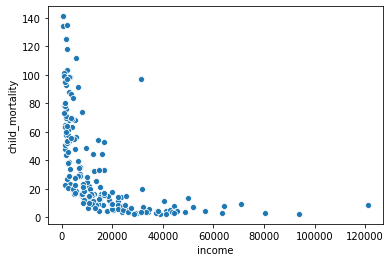

In [13]:
# plot child_mortality against a nation's income
sns.scatterplot('income', 'child_mortality', data=world_data_2014)

We see that generally, the higher the income of a nation, there are relatively fewer childhood deaths. However, this relationship is non-linear, but could be represented by a `log` function. 
___
a. Use `sm.GLM()` to create a generalized linear model stored in a variable `le_model` which models a relationship between `income` (independant variable) and `child_mortality` (dependant variable). Add a constant to independant variable using `sm.add_constant()`.

Set `family=sm.families.Gaussian(link=sm.families.links.log())` to make sure we are using the correct link function. Fit the model and store the results of the fit in `le_results`. 

The answer can take more lines of code than provided, and/or require intermediate depending on your approach  (1 mark)

In [14]:

le_model = sm.GLM(world_data_2014['child_mortality'], sm.add_constant(world_data_2014['income']), family=sm.families.Gaussian(link=sm.families.links.log()))

le_results = le_model.fit()


# do not change the code below()
print(le_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        child_mortality   No. Observations:                  179
Model:                            GLM   Df Residuals:                      177
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                          437.59
Method:                          IRLS   Log-Likelihood:                -797.26
Date:                Fri, 27 Nov 2020   Deviance:                       77453.
Time:                        20:11:06   Pearson chi2:                 7.75e+04
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5105      0.054     82.989      0.0

Hint: you can create a GLM by providing the variables and distribution family/link like below:

`sm.GLM(y, x, family=sm.families.Gaussian(link=sm.families.links.log()))` 

where y is your dependant variable, and x is your independant variable. 
___

b. To look at how well our model predicts our data:
1. create a plot using `sns.scatterplot()` to plot the actual `world_data_2014` data for `child_mortality` vs `income` and set `label='data'` to add a legend label
2. in the same cell, use `plt.scatter()` to plot the `fittedvalues` stored in `le_results` against the `income` in `world_data_2014` and set `label='prediction'` to add a legend label

(1 mark)

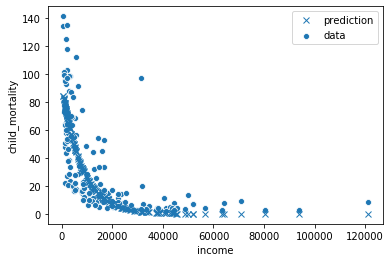

In [15]:
sns.scatterplot('income', 'child_mortality', data=world_data_2014, label='data')
plt.plot(world_data_2014["income"], le_results.fittedvalues, 'x', label='prediction')
plt.legend()
plt.show()
